# Recurrent Neural Networks

- 지금까지 본애들은 이미지에 대한 거였다. 
- 다른 벡터로 바꾸거나 
- CNN은 이미지를 원하는 형태로 바꿔줌.
    - classification은 원핫벡터 혹은 내가원하는 클래스개수만큼 벡터라 바꿔줌
    - detection은 Neural net의 출력값이 각각의 영역에 있는 바운딕 박스를 찾는것으로 바꿔주고
    - semantic segmentation은 이미지의 각 픽셀별로 어떤 클래스에 속하는지를 찾아주는 문제로 바꿈
- RNN은 주어진 입력이 Sequential 이다.

> 1.Sequential Model에 대해 배워보자

> 2.LSTM 각각의 component가 어떻게 동작을 하고

> 3.이게 왜 long term dependencies를 잡는데 도움이 되는지 알아보자.

# 1.Sequential Model
- 내가 받아 들여야 하는 입력의 차원을 알 수 없다.
    - 그래서 Convolution Layer 같은것을 사용 못함 -> 언제까지 입력이 들어올지도 모르니까
- 입력이 들어왔을 때, 다음에 어떤 단어가 나올지 예측하는 것
    - 과거에 들어왔던 것을 본다.
        - 과거의 5개를 보고 미래를 예측하겠다

# 1-1.  Naive sequence model

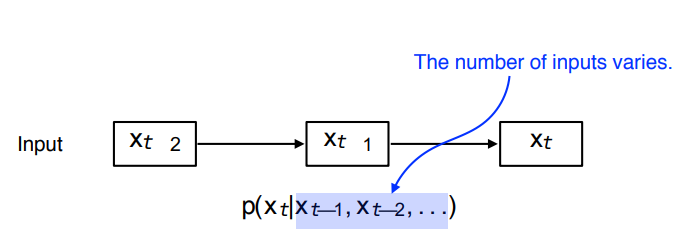

# 1-2. Autoregressive model

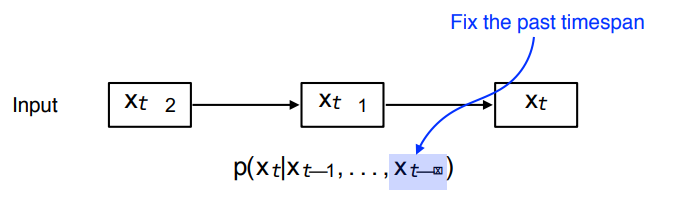

# 1-3. Markov model (first-order autoregressive model)
- 바로 직전의 과거만 영향을 미친다.
    - 수능은 바로 전날 공부한 것만 영향을 미친다.
- 많은 정보를 버릴 수 밖에 없다.
- 단, joint distribution을 굉장히 잘 표현할 수 있다.

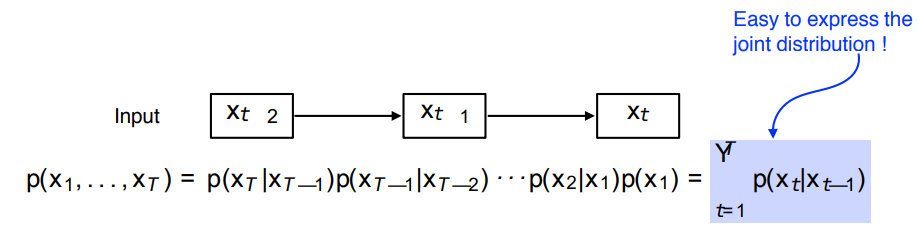

# 1-4. Latent autoregressive model
- hidden state를 하나 추가함.
- 이 hidden state는 과거의 정보를 summary함
- 단 하나가 아니라 과거의 정보를 요약해둠. 

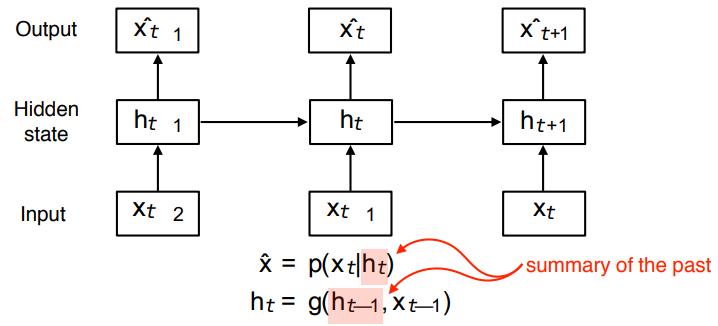

# 2.RNN
- 앞에서 본 MLP와 하나 빼고 다 똑같다
    - 자기 자신으로 돌아오는 구조가 하나 있는것
- 뒤에는 RNN의 문제를 해결한 LSTM에 대해 배워보겠다.

- time step t에서 보고 있는것은 시간순으로 푼 것이다.
    - 어떤 정보가 x1과 합쳐져서 h1이 나오고 
- time step을 fix하고 시간순서로 풀게되면, 결국에 각각의 네트워크가 share하는 굉장히 input의 width가 큰(?) 네트워크 하나가 된다.

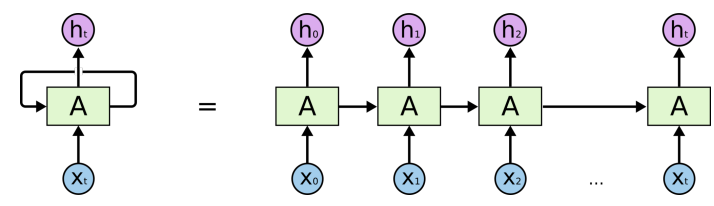

# 2-1. 단점1 Sort-term dependencies
- 과거의 정보들이 summary되어서 미래에서 고려해야한다.
- RNN은 어떤 하나의 fixed rules로 이 정보를 계속 취합하기때문에, 과거에 있던 정보가 미래까지 살아 남기가 어렵다.
- 몇 스탭 전에 있는 정보는 고려가 잘 되는데, 너무 옛날 정보는 고려가 잘 안된다
    - 음성데이터라고하자. 5초전 까지만 음성이 기록되면 안좋겠지
- 그래서 long-term dependencies가 나옴.

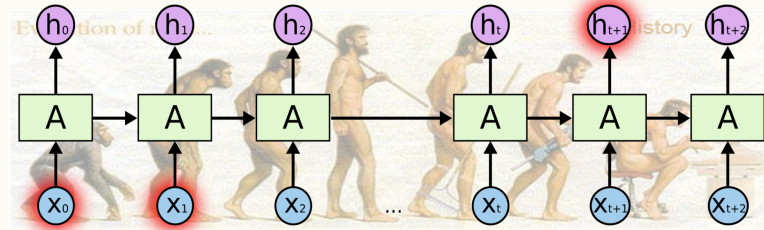

- h4가 되려면 똑같은 weight를 곱하고 non linear를 통과시키게 된다.
- sigmoid라고 생각해보자(값을 줄임)
- tanh.
- activation function이 시그모이드인경우, Vanishing gradient가 되어서 중간에 학습이 죽어버리거나 멀리서 정보가 못넘어감
- activation function이 Relu인경우, exploding gradient가 되어서 학습할 때, 네트워크가 폭발해버릴 수 있음.
    - 그래서 RNN에 relu를 잘안씀


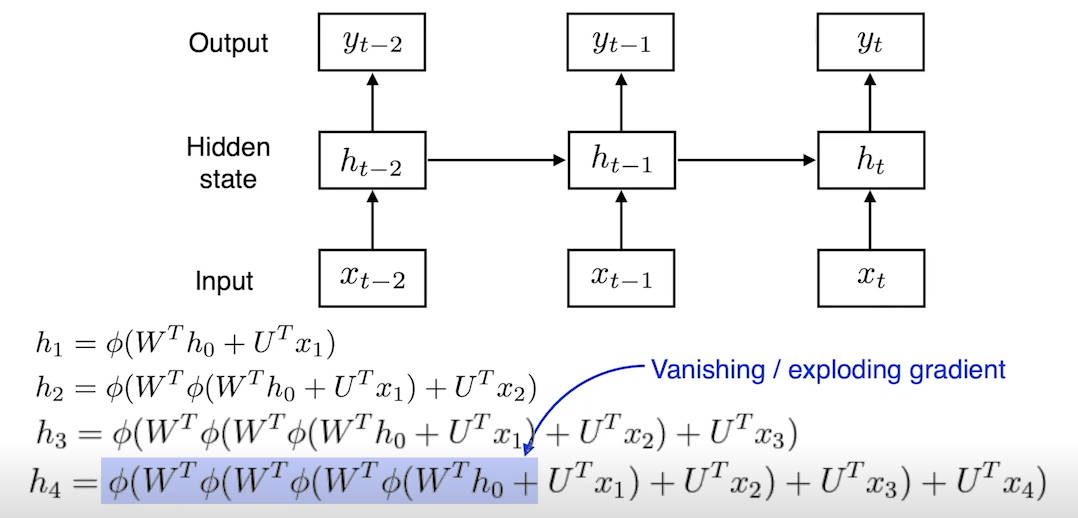

# 2-2. tanh를 activation function으로 사용하는 가장 기본적인 RNN구조

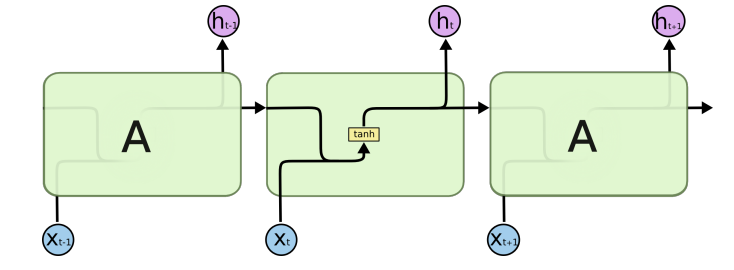

# 2-3. LSTM(Long Short Term Memory)
- 각각의 component가 어떻게 동작을 하고
- 이게 왜 long term dependencies를 잡는데 도움이 되는지 알아보자.

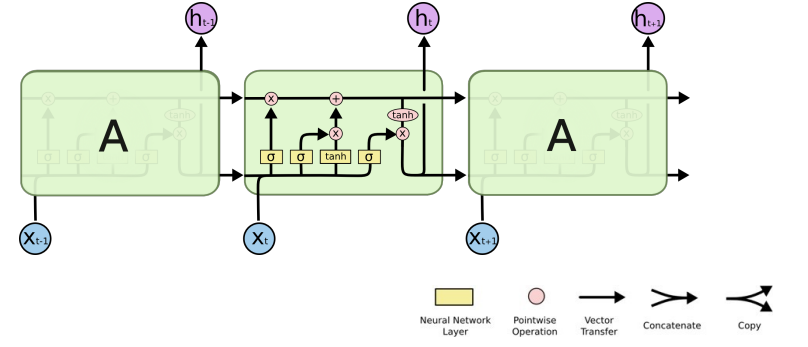

1. x는 입력.
    - 예를들어 언어라서 50000개의 단어를 사용한다면, x는 50000짜리 one-hot-vector일수도 있고, 일반적으로 단어 하나마다 어떤 벡터로 표현되는 어떤 벡터 
2. ht는 ouput. 히든 스테이트라고 부름
    - 다음번 단어의 분포를 찾거나, 확률을 모델리하겠다면 language model이 됨.
3. 윗쪽 라인에 있는게 previous cell state이다.
    - 0~t까지 들어왔던 t+1개의 정보를 다 취합해서 summarize해준거
4. 아래 선은 precious hidden state
5. LSTM을 이해할 때 gate로 생각하자.

#### LSTM의 입력으로 들어가는것은 이전의 출력값(Precious hidden state)와 밖으로는 나가지 않는 Previous cell state, 현재 time step 의 t 총3개이다.
#### 들어오는 입력이 3개. 나가는 것도 3개인데 실제로 나가는것은 hidden state밖에 없다.

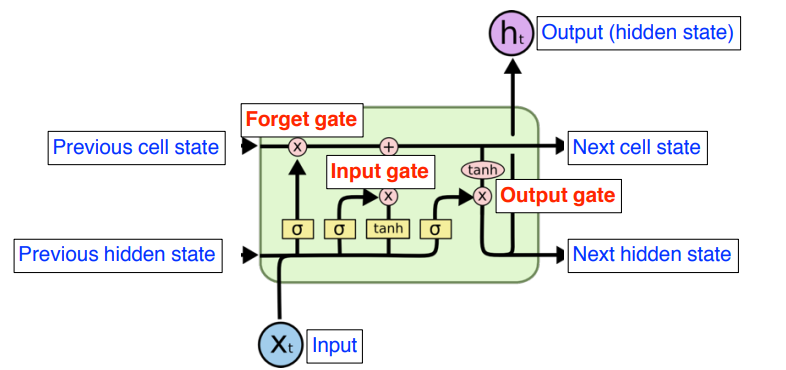

1. forget gate
    - 시그모이드를 통과하기때문에 0~1. 
    - ft가 이전의 cell state에서 나온 정보중에 어떤것을 버리고 살릴지를 정해줌
        - 이전의 히든 스테이트와 (previous hidden state)와 입력을 시그모이드로해서 버릴 정보를 정함
2. input gate
    - 역할: 이전의 정보들을 cell state에다 무조건 올리는 것이 아니라, 이 정보중에 어떤 정보를 올릴지 말지를 결정한다.
    - 'C틸다'가 현재정보와 이전출력값으로 만들어지는 cell state예비군이다.
    - 이전까지 summarize했던 cell state와 내가 현재 정보와 이전 아웃풋으로 얻어지는 cell state candidate(후보군)을 잘 섞어서 새로운 cell state로 업데이트 하겠다.
    

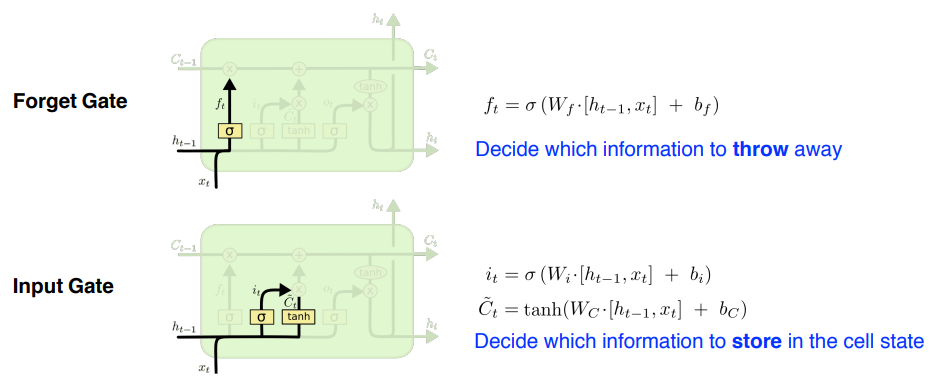

3. update cell
    - ft만큼, 즉 fotgetgate에서 나온것 만큼 Ct-1을 곱해서 버릴것은 버리고, input gate에서 나왔던 C틸다를 가지고 it만큼 곱해서 어느 값을 올릴지를 정해서 두 값을 combine한것을 새로운 cell state로 업데이트한다.
        - 버릴것은 버리고 쓸건 쓰고. cell state를 업데이트함
4. output gate

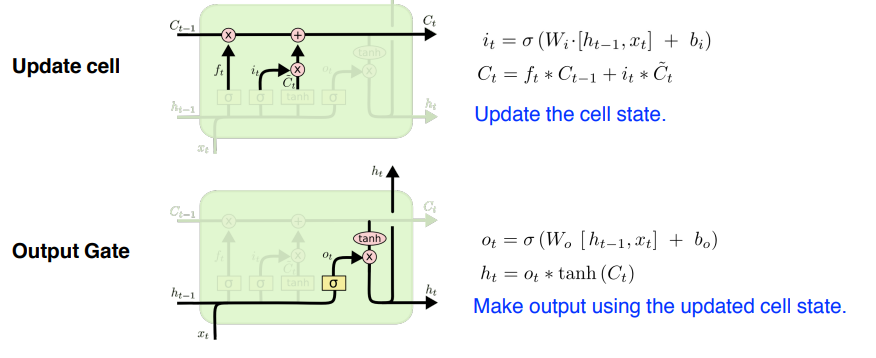

## 2-4. 위 4가지를 잘 조합한게 LSTM이다. 
1. 이전까지 들어왔던 정보들을 현재 입력을 바탕으로 지울지
2. 현재 입력을 바탕으로 어떤값을 새롭게 쓸지
3. 이 1,2 정보를 취합하는게 Update cell이고
4. 취합된 cell state를 한 번 더 조작해서 어떤 값을 밖으로 빼낼지를 정하는게 output gate이다.

# 3. GRU(Gated Recurrent Unit)
### 텐서플로나 파이토치 쓰게되면, LSTM 모듈로 사용된게 3가지다.
1. 바닐라RNN 
2. LSTM
3. GRU


GRU는 gate가 2개다 
1. reset gate
2. update gate

- LSTM은 cell state가 하나 흘러가고 그걸 한번 더 manipulate한것을 output한 hidden state가 나옴. 
- GRU는 hidden state가 곧 output이고, 다음번으로 들어간다.

> LSTM보다 GRU를 사용하면 성능이 좋은경우가 꽤 됨. 파라미터가 적으니까.

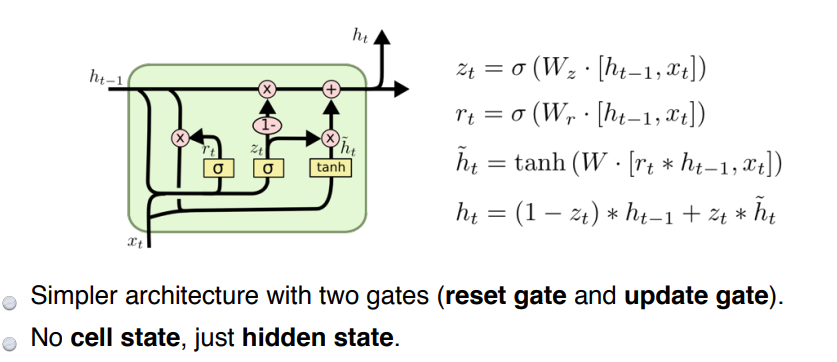

# 4. 정리
## 요즘은 Transformer가 나오면서 lstm, gru잘안씀. rnn구조가 transformer가 훨씬 잘되니까 조금씩 변함

소설 써볼때 rnn써보면좋을듯 

1. RNN은 sort term dependencies를 잘 잡지만, long term dependecies를 잘 못잡는구나. 
2. 그래서 lstm이 나왔고, gate가 3개 필요하니까 파라미터가 많이 필요함
3. 파라미터를 줄이려고 게이트 하나 줄여서 GRU
4. 많은 경우, GRU가 LSTM보다 성능이 좋다는 걸 증명